## test the pylamost

In order to access protected LAMOST data, you should provide your token.
Your token can be obtained from http://www.lamost.org/lmusers/user/, the "Password" is the token.
When you get your token you can also create a file `~/pylamost.ini` or `%userprofile%/pylamost.ini` on Windows, with content:
```
token=12345678
```
Then you don't have to write the token next time.

In [1]:
from pylamost import lamost
lm=lamost(dataset=8)#init the lamost class
#lm.token='12345678'#specify your token. You can pass this step, if you created the ~/pylamost.ini file.
#Using international released data, token can be skip, except sql() function.

#lm.dataset=8 #specify the Data Release number
#lm.version=2.0 #specify the data version, or leave it None to always use the leatest version.

### Query interface

In [ ]:
# query low resolution catalog by obsid
params={'output.fmt':'csv','obsidTextarea':'353301001'}
low=lm.query(params)
print(low)

In [ ]:
# query medium resolution catalog by obsid
params={'output.fmt':'csv','obsidTextarea':'588902003'}
med=lm.query(params, ismed=True)
print(med)

In [ ]:
# query low resolution catalog by ra,dec file
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
low=lm.query2(params, files)
print(low)

In [ ]:
# query medium resolution catalog by ra,dec file
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
low=lm.query2(params, files, ismed=True)
print(low)

### SQL query interface

In [ ]:
s=lm.sql("select c.obsid,c.obsdate, c.ra, c.dec, c.z, c.lmjd from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.2d>' limit 5")
print(s)

In [ ]:
s=lm.sql("select c.obsid from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.3d>' limit 5")
print(s)

In [ ]:
csv = lm.getFitsCsv(obsid='101068')
print(csv)

### simple information

In [ ]:
# get low resolution fiber info
info=lm.getInfo('353301001')
for k,v in info.items():
    print(k,':',v)

In [ ]:
# get medium resolution fiber info
info=lm.getInfo('588902003', ismed=True)
print(info)

### download FITS file

In [ ]:
#download low resolution fits file by obsid
lm.downloadFits(obsid='353301001',savedir='./')

In [ ]:
#download medium resolution fits file by obsid
lm.downloadFits(obsid='588902003',savedir='./',ismed=True)

### download spectrumthumbnail png

In [ ]:
#download low resolution spectrum thumbnail png file by obsid
#medium resolution fits file has no png thumbnail
lm.downloadPng(obsid='353301007',savedir='./')

### download csv format spectrum

In [ ]:
#download low resolution csv format spectrum by obsid
csv = lm.getFitsCsv(obsid='353301007')
print(csv)

In [ ]:
#download medium resolution csv format spectrum by obsid
csv = lm.getFitsCsv(obsid='588902003',ismed=True)
print(csv)

### Cone Search Protocol

In [ ]:
#fetch low resolution catalog conesearch result 
cs = lm.conesearch(ra=10.0004738,dec=40.9952444,radius=0.2)
print(cs)

In [ ]:
#fetch medium resolution catalog conesearch result 
cs = lm.conesearch(ra=15.3672776,dec=4.0094024,radius=0.002, ismed=True)
print(cs)

### Simple Spectral Access Protocol

In [ ]:
#fetch low resolution ssap search result 
ssap = lm.ssap(ra=10.0004738,dec=40.9952444,radius=0.2)
print(ssap)

In [ ]:
#fetch medium resolution ssap search result 
ssap = lm.ssap(ra=15.3672776,dec=4.0094024,radius=0.002)
print(ssap)

### read local spectrum fits to data array

In [4]:
#read low resolution spectrum fits file
wavelength, specflux, spec_smooth_7, spec_smooth_15=lm.readFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')
print('wavelength', wavelength)
#print('specflux', specflux)
#print('spec_smooth_7', spec_smooth_7)
print('spec_smooth_15', spec_smooth_15)

wavelength [3699.9863 3700.8384 3701.6907 ... 9094.945  9097.04   9099.135 ]
spec_smooth_15 [73.32356 73.32356 73.32356 ...  0.       0.       0.     ]


### plot local spectrum

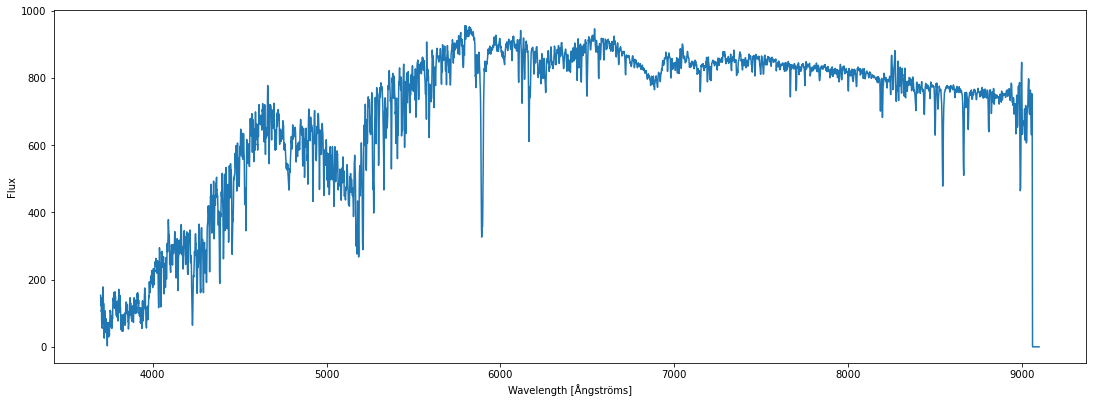

In [5]:
lm.plotFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')

### download spectrum data and plot

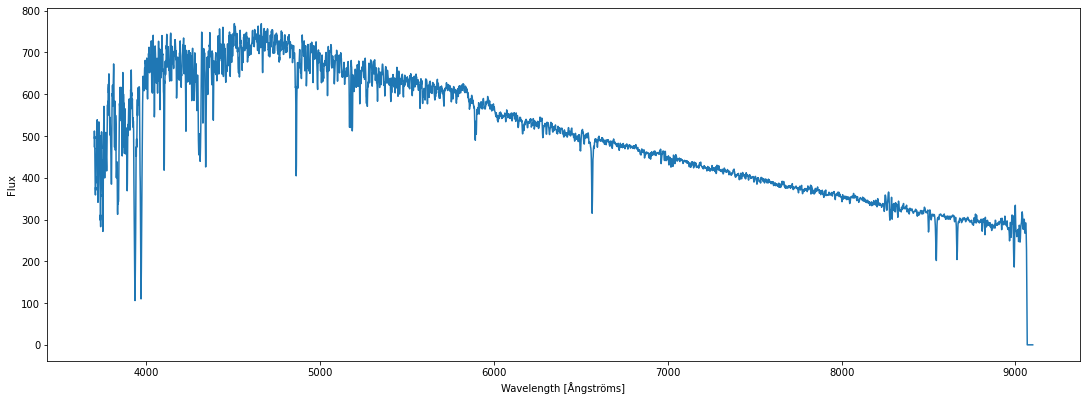

In [6]:
lm.downloadAndPlotSpectrum('353301007')